<a href="https://colab.research.google.com/github/Shirinii/classification/blob/main/Project6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification of drug types based on the patients characterictics

Author : Shirin Rezaei

StudentID : 

In [2]:
pip install imbalanced-learn==0.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 167 kB 4.9 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [3]:
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 5.3 MB/s 
     |████████████████████████████████| 325 kB 44.6 MB/s 
     |████████████████████████████████| 662 kB 42.3 MB/s 
     |████████████████████████████████| 88 kB 6.7 MB/s 
     |████████████████████████████████| 147 kB 45.3 MB/s 
     |████████████████████████████████| 2.0 MB 39.0 MB/s 
     |████████████████████████████████| 16.5 MB 359 kB/s 
     |████████████████████████████████| 25.8 MB 6.5 MB/s 
     |████████████████████████████████| 6.8 MB 43.7 MB/s 
     |████████████████████████████████| 1.3 MB 41.8 MB/s 
     |████████████████████████████████| 1.7 MB 42.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.0 MB 51.3 MB/s 
     |████████████████████████████████|

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
from pycaret.utils import version
version()

'2.3.6'

In [6]:

print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)
     


Pandas version:  1.3.5
Seaborn version:  0.11.2


In [7]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Shirinii/classification/main/bird(1).csv')
df.head(5)

huml  humw  ulnal  ulnaw   feml  femw type
0  80.78  6.68  72.01   4.88  41.81  3.70   SW
1  88.91  6.63  80.53   5.59  47.04  4.30   SW
2  79.97  6.37  69.26   5.28  43.07  3.90   SW
3  77.65  5.70  65.76   4.77  40.04  3.52   SW
4  62.80  4.84  52.09   3.73  33.95  2.72   SW

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   huml    413 non-null    float64
 1   humw    413 non-null    float64
 2   ulnal   413 non-null    float64
 3   ulnaw   413 non-null    float64
 4   feml    413 non-null    float64
 5   femw    413 non-null    float64
 6   type    413 non-null    object 
dtypes: float64(6), object(1)
memory usage: 22.7+ KB


In [9]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [10]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [11]:
df.describe()


huml        humw       ulnal       ulnaw        feml        femw
count  413.000000  413.000000  413.000000  413.000000  413.000000  413.000000
mean    64.874867    4.381235   69.197409    3.606538   36.822446    3.221768
std     54.056078    2.861460   58.929490    2.190150   19.899356    2.021169
min      9.850000    1.140000   14.090000    1.000000   11.830000    0.930000
25%     25.360000    2.200000   28.160000    1.870000   21.350000    1.720000
50%     44.180000    3.500000   43.710000    2.960000   31.090000    2.520000
75%     90.490000    5.820000   97.520000    4.770000   47.090000    4.110000
max    420.000000   17.840000  422.000000   12.000000  117.070000   11.640000

**Bar Plot**

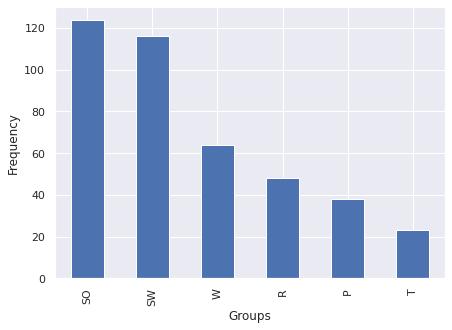

In [12]:
y =df['type']
y.value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel("Groups")
plt.show()

In [13]:
X = df.drop(columns=['type'])
X.head(10)

huml   humw   ulnal  ulnaw   feml  femw
0   80.78   6.68   72.01   4.88  41.81  3.70
1   88.91   6.63   80.53   5.59  47.04  4.30
2   79.97   6.37   69.26   5.28  43.07  3.90
3   77.65   5.70   65.76   4.77  40.04  3.52
4   62.80   4.84   52.09   3.73  33.95  2.72
5   61.92   4.78   50.46   3.47  49.52  4.41
6   79.73   5.94   67.39   4.50  42.07  3.41
7   86.98   5.68   74.52   4.55  44.46  3.78
8  118.20   7.82  116.64   6.13  59.33  5.45
9  145.00  10.42  144.00   7.05  70.96  7.44

In [14]:
X.describe().transpose()

count       mean        std    min    25%    50%    75%     max
huml   413.0  64.874867  54.056078   9.85  25.36  44.18  90.49  420.00
humw   413.0   4.381235   2.861460   1.14   2.20   3.50   5.82   17.84
ulnal  413.0  69.197409  58.929490  14.09  28.16  43.71  97.52  422.00
ulnaw  413.0   3.606538   2.190150   1.00   1.87   2.96   4.77   12.00
feml   413.0  36.822446  19.899356  11.83  21.35  31.09  47.09  117.07
femw   413.0   3.221768   2.021169   0.93   1.72   2.52   4.11   11.64

**Standardize the Data**

In [15]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)
     

huml      humw     ulnal     ulnaw      feml      femw
0  0.294591  0.804328  0.047786  0.582155  0.250943  0.236899
1  0.445173  0.786834  0.192541  0.906727  0.514084  0.534117
2  0.279588  0.695861  0.001063  0.765012  0.314338  0.335971
3  0.236618  0.461430 -0.058402  0.531869  0.161887  0.147733
4 -0.038430  0.160520 -0.290655  0.056440 -0.144524 -0.248557
5 -0.054729  0.139526 -0.318349 -0.062417  0.638863  0.588607
6  0.275143  0.545405 -0.030708  0.408441  0.264025  0.093243
7  0.409426  0.454432  0.090431  0.431298  0.384275  0.276528
8  0.987674  1.203210  0.806050  1.153584  1.132441  1.103784
9  1.484057  2.112939  1.270897  1.574156  1.717591  2.089557

In [16]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
huml   413.0 -2.064531e-16  1.001213 -1.019157 -0.731884 -0.383305  0.474437   
humw   413.0  2.064531e-16  1.001213 -1.134095 -0.763205 -0.308340  0.503418   
ulnal  413.0 -2.064531e-16  1.001213 -0.936276 -0.697226 -0.433031  0.481201   
ulnaw  413.0  6.881770e-17  1.001213 -1.191562 -0.793847 -0.295560  0.531869   
feml   413.0  6.881770e-17  1.001213 -1.257466 -0.778478 -0.288421  0.516600   
femw   413.0  1.032265e-16  1.001213 -1.135257 -0.743920 -0.347630  0.439998   

            max  
huml   6.577537  
humw   4.709166  
ulnal  5.994121  
ulnaw  3.837016  
feml   4.037562  
femw   4.170082

**Observations and variables**

In [17]:
observations = list(df.index)
variables = list(df.columns)

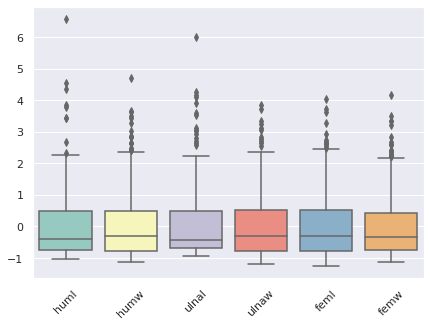

In [18]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set3")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
     

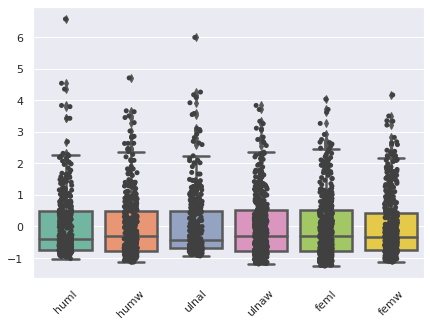

In [19]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


**Correlation Matrix**

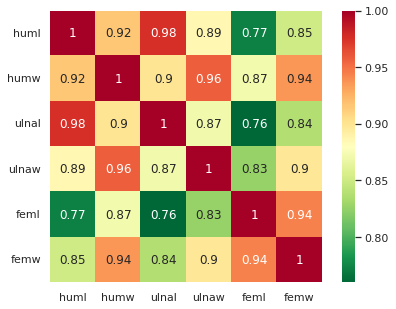

In [20]:
x = sns.heatmap(X.corr(), vmax=1, square=True,annot=True,cmap='RdYlGn_r')
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);     

In [21]:
eigen_values, eigen_vectors = np.linalg.eig(X.corr())
print(eigen_vectors)
print(eigen_values)


[[ 0.40836626  0.46005248 -0.26798864 -0.73414513  0.10165527 -0.02163181]
 [ 0.42194129 -0.00821     0.32808876  0.20845518  0.77119918  0.2757792 ]
 [ 0.40397641  0.49812    -0.35647068  0.64134647 -0.20464578 -0.0916678 ]
 [ 0.41113675  0.03791395  0.73307053 -0.05786172 -0.38769279 -0.37213307]
 [ 0.3903953  -0.63085274 -0.38536093 -0.00317118  0.13470908 -0.53193673]
 [ 0.41299357 -0.37516413 -0.08702331 -0.05379624 -0.42963461  0.70259177]]
[5.4055206  0.35924937 0.1400567  0.02250079 0.03089697 0.04177556]


<Figure size 504x360 with 0 Axes>

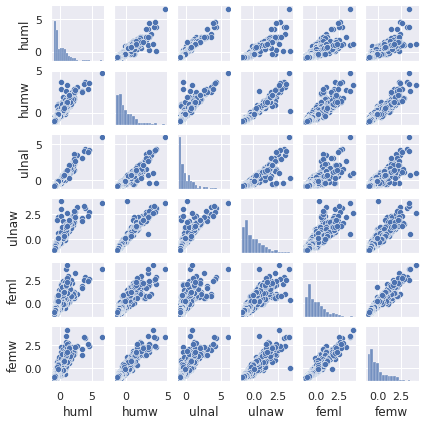

In [22]:
plt.figure()
sns.set(context='notebook',style='darkgrid', palette='deep',font='sans-serif', font_scale=1)
pairplot= sns.pairplot(data=X,height=1)    


**Principal Component Analysis (PCA)**

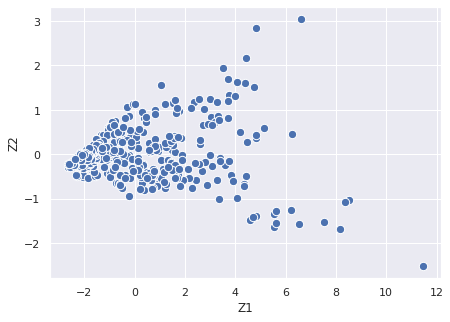

In [23]:
pca = PCA()
Z = pca.fit_transform(X)
plt. figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.scatter(Z[:,0], Z[:,1], s=70,edgecolors='white')


**Eigenvectors**

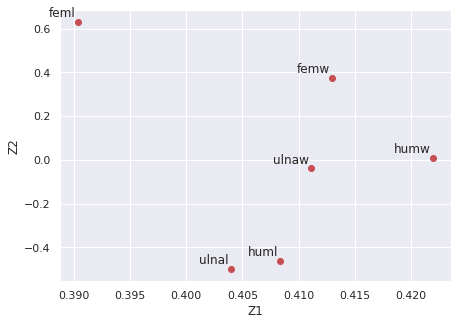

In [24]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('Z1')
plt.ylabel('Z2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
     

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


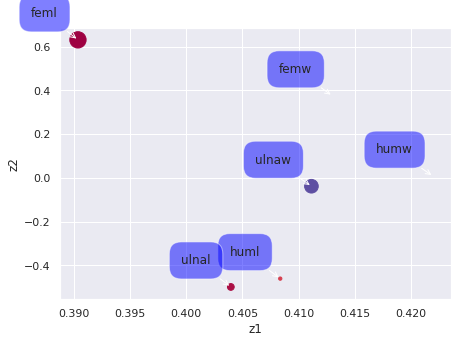

In [25]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('z1')
plt.ylabel('z2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=1', fc='blue', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

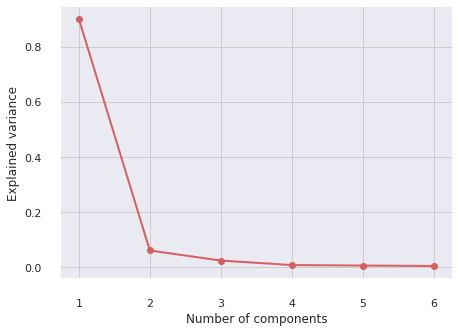

In [26]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
sns.set(context='notebook',style='ticks', palette='muted',font='sans-serif', font_scale=1)
sns.despine(offset=10)
     

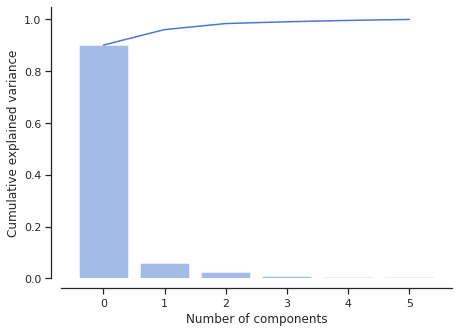

In [27]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
sns.set(palette='muted',font='sans-serif', font_scale=1)
sns.despine(offset=10)    

**Biplot**

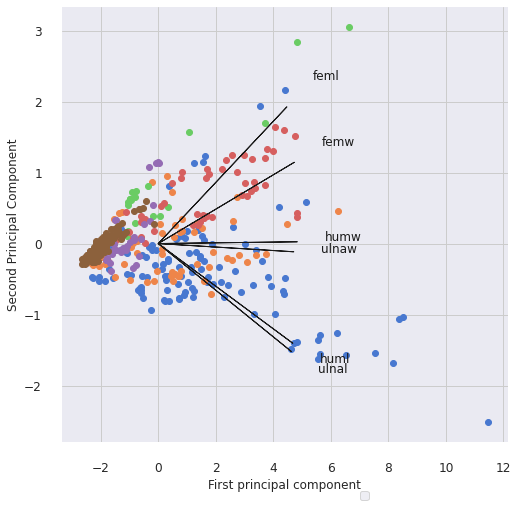

In [28]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]
fig, ax = plt.subplots(figsize=(8,8))

for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  ax.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  ax.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
for i in df['type'].unique():
    ax.scatter(Z1[df['type']==i], Z2[df['type']==i])
legend = ax.legend(shadow=False, ncol=3, bbox_to_anchor=(0.7, -0.1),loc='upper right')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
sns.set(context='notebook',style='ticks', palette='Set3',font='sans-serif', font_scale=1.1)
sns.despine(offset=10)
plt.show()

     

Text(0.5, 1.0, 'PCA Covariance Matrix')

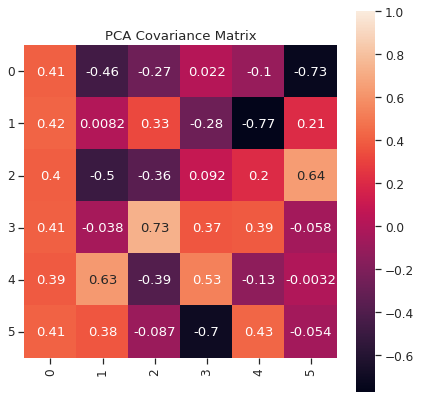

In [29]:
comps = pd.DataFrame(A)
plt.figure(figsize=(7,7))
ax=sns.heatmap(comps,vmax=1, square=True,annot=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=True,labeltop=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('PCA Covariance Matrix')


**Using PCA library**

In [30]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=fa6fb719a8baa81fc428e561a5b127dd5fbf98c42e5d7d0308d9c65b0257b1c0
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=41eb855b4e6ab6b8c4f7c031059df1abb2cdf0f0bedd1b8e6ca71dd8ef5658b2
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [31]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [32]:

out['PC']

PC1       PC2
0    0.914135  0.072385
1    1.385645  0.196064
2    0.984211  0.171899
3    0.610614  0.061409
4   -0.201251 -0.022784
..        ...       ...
408 -2.238420 -0.044531
409 -2.188181 -0.059500
410 -2.162006  0.002105
411 -2.097052 -0.011672
412 -2.365612 -0.101235

[413 rows x 2 columns]

**Scatter plot****

[colourmap]> Warning: Colormap [Set1] can not create [413] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [413] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3ef715cd00>)

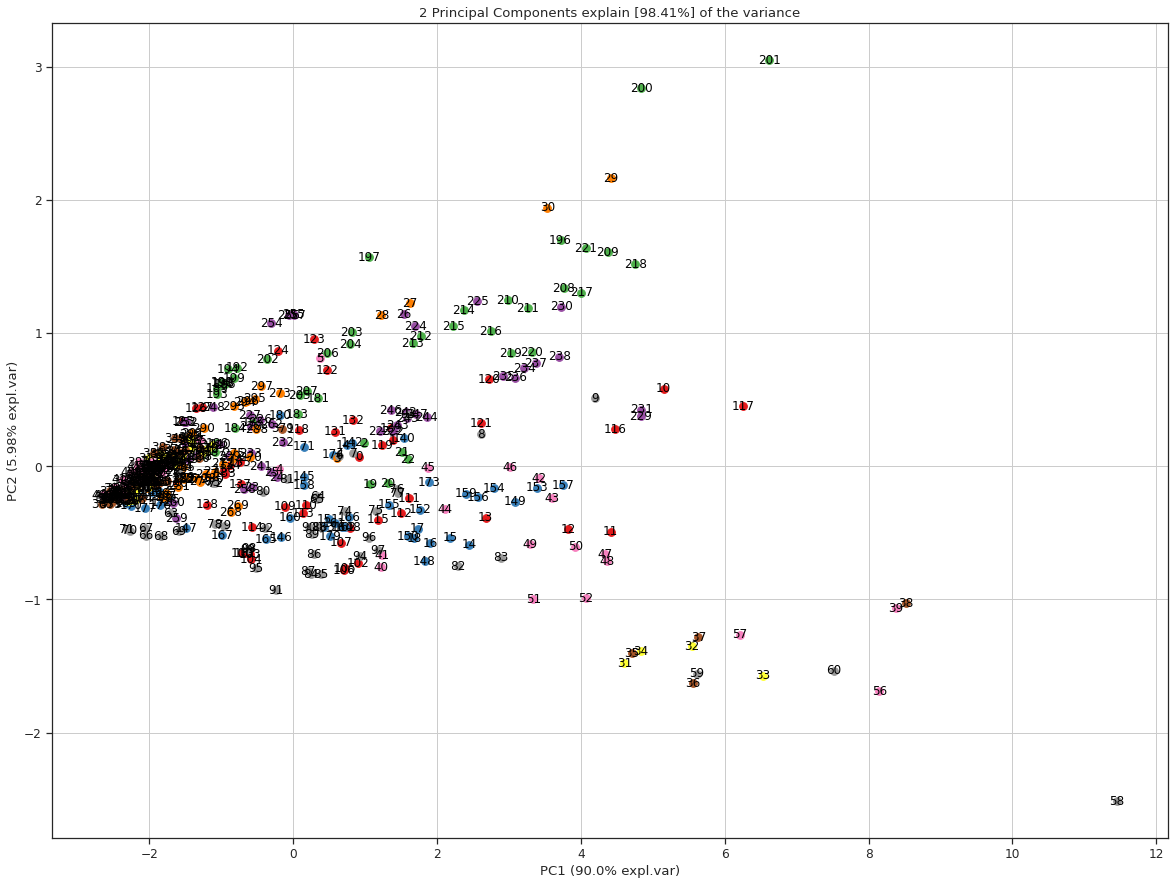

In [33]:
model.scatter(label=True,legend=False)

**Eigenvectors**

In [34]:
A = out['loadings'].T

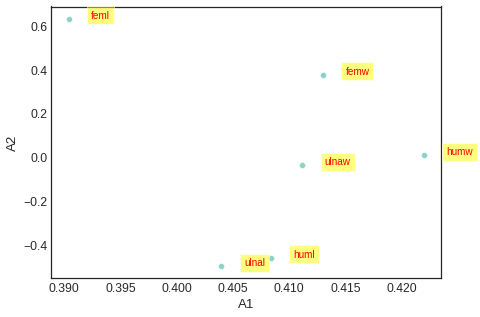

In [35]:
plt. figure()
plt.style.use('seaborn-white') 
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
          plt.text(x=A.PC1[i]+0.002,y=A.PC2[i]+0.002, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Screen Plot**

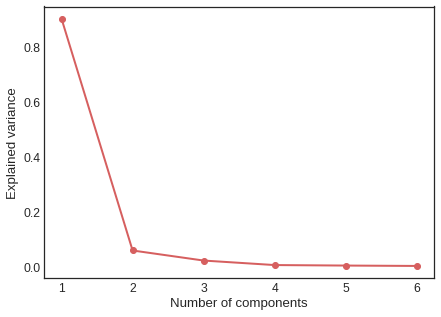

In [36]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

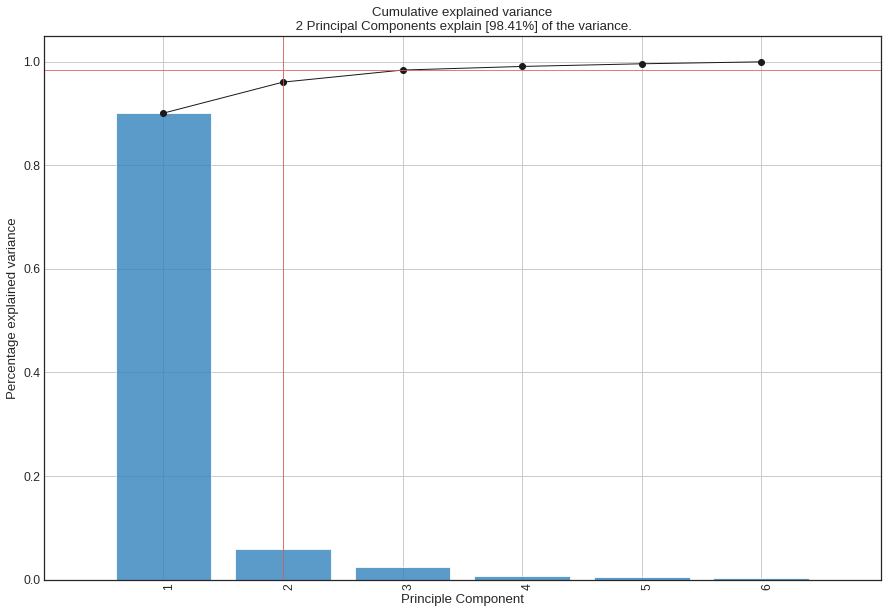

<Figure size 504x360 with 0 Axes>

In [37]:
model.plot();

**biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [413] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [413] unique colors! Available unique colors: [9].


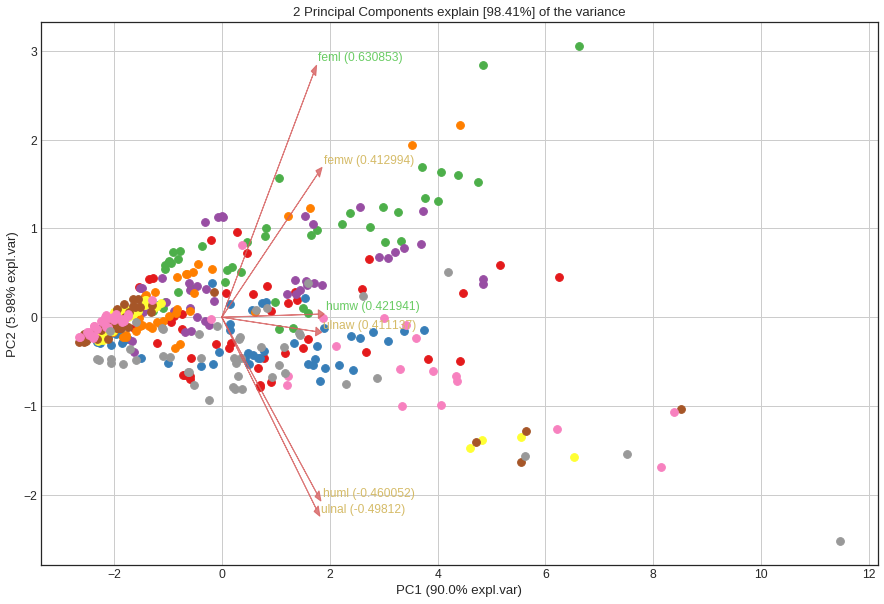

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3ef6996190>)

In [38]:
model.biplot(label=False, legend=False)

In [39]:
model.biplot3d(legend=False)

[pca] >Requires 3 PCs to make 3d plot. Try to use biplot() instead.


(None, None)

**Classification**

In [40]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [41]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
     

Data for Modeling: (372, 7)
Unseen Data For Predictions: (41, 7)


In [42]:
from pycaret.classification import *
     

In [43]:
clf = setup(data=data, target='type', train_size=0.7, session_id=1368)

Description  \
0                               session_id   
1                                   Target   
2                              Target Type   
3                            Label Encoded   
4                            Original Data   
5                           Missing Values   
6                         Numeric Features   
7                     Categorical Features   
8                         Ordinal Features   
9                High Cardinality Features   
10                 High Cardinality Method   
11                   Transformed Train Set   
12                    Transformed Test Set   
13                      Shuffle Train-Test   
14                     Stratify Train-Test   
15                          Fold Generator   
16                             Fold Number   
17                                CPU Jobs   
18                                 Use GPU   
19                          Log Experiment   
20                         Experiment Name   
21                                     USI   
22                         Imputation Type   
23          Iterative Imputation Iteration   
24                         Numeric Imputer   
25      Iterative Imputation Numeric Model   
26                     Categorical Imputer   
27  Iterative Imputation Categorical Model   
28           Unknown Categoricals Handling   
29                               Normalize   
30                        Normalize Method   
31                          Transformation   
32                   Transformation Method   
33                                     PCA   
34                              PCA Method   
35                          PCA Components   
36                     Ignore Low Variance   
37                     Combine Rare Levels   
38                    Rare Level Threshold   
39                         Numeric Binning   
40                         Remove Outliers   
41                      Outliers Threshold   
42                Remove Multicollinearity   
43             Multicollinearity Threshold   
44             Remove Perfect Collinearity   
45                              Clustering   
46                    Clustering Iteration   
47                     Polynomial Features   
48                       Polynomial Degree   
49                    Trignometry Features   
50                    Polynomial Threshold   
51                          Group Features   
52                       Feature Selection   
53                Feature Selection Method   
54            Features Selection Threshold   
55                     Feature Interaction   
56                           Feature Ratio   
57                   Interaction Threshold   
58                           Fix Imbalance   
59                    Fix Imbalance Method   

                                   Value  
0                                   1368  
1                                   type  
2                             Multiclass  
3   P: 0, R: 1, SO: 2, SW: 3, T: 4, W: 5  
4                               (372, 7)  
5                                  False  
6                                      6  
7                                      0  
8                                  False  
9                                  False  
10                                  None  
11                              (260, 6)  
12                              (112, 6)  
13                                  True  
14                                 False  
15                       StratifiedKFold  
16                                    10  
17                                    -1  
18                                 False  
19                                 False  
20                      clf-default-name  
21                                  80c3  
22                                simple  
23                                  None  
24                                  mean  
25                                  None  
26                              constant  
27                  

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [44]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.7808  0.9351  0.6612  0.7776   
et                 Extra Trees Classifier    0.7808  0.9476  0.7161  0.8034   
qda       Quadratic Discriminant Analysis    0.7615  0.9495  0.7148  0.7850   
rf               Random Forest Classifier    0.7538  0.9285  0.6797  0.7767   
lightgbm  Light Gradient Boosting Machine    0.7462  0.9251  0.6774  0.7579   
gbc          Gradient Boosting Classifier    0.7385  0.9157  0.6580  0.7491   
knn                K Neighbors Classifier    0.7231  0.9009  0.6312  0.7381   
ridge                    Ridge Classifier    0.6885  0.0000  0.4822  0.6375   
dt               Decision Tree Classifier    0.6808  0.8040  0.6037  0.7124   
lda          Linear Discriminant Analysis    0.6769  0.8904  0.4864  0.6424   
nb                            Naive Bayes    0.4962  0.8276  0.4315  0.5397   
svm                   SVM - Linear Kernel    0.4885  0.0000  0.3583  0.4599   
ada                  Ada Boost Classifier    0.3346  0.7066  0.3106  0.2878   
dummy                    Dummy Classifier    0.3000  0.5000  0.1667  0.0902   

              F1   Kappa     MCC  TT (Sec)  
lr        0.7625  0.7128  0.7203     0.781  
et        0.7643  0.7112  0.7237     0.184  
qda       0.7543  0.6943  0.7035     0.021  
rf        0.7348  0.6778  0.6902     0.226  
lightgbm  0.7285  0.6679  0.6780     0.198  
gbc       0.7218  0.6599  0.6714     0.563  
knn       0.7031  0.6381  0.6506     0.023  
ridge     0.6195  0.5747  0.6089     0.014  
dt        0.6783  0.5912  0.5985     0.018  
lda       0.6293  0.5646  0.5929     0.020  
nb        0.4842  0.3619  0.3749     0.019  
svm       0.4199  0.3409  0.3975     0.028  
ada       0.2779  0.1845  0.2182     0.104  
dummy     0.1387  0.0000  0.0000     0.017

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1368, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [45]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1368, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
#Create the model 
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8077  0.9481  0.7153  0.7654  0.7805  0.7456  0.7532
1       0.6923  0.8890  0.6458  0.6229  0.6504  0.5953  0.6001
2       0.9231  0.9662  0.8611  0.9350  0.9161  0.8982  0.9019
3       0.8077  0.9505  0.5833  0.7874  0.7807  0.7441  0.7503
4       0.7308  0.8905  0.5347  0.7174  0.7111  0.6417  0.6511
5       0.6923  0.8782  0.5063  0.7183  0.6754  0.5969  0.6116
6       0.8462  0.9783  0.8167  0.8397  0.8258  0.8041  0.8104
7       0.7308  0.9534  0.6262  0.7575  0.7136  0.6592  0.6680
8       0.8077  0.9587  0.7429  0.8782  0.8261  0.7579  0.7651
9       0.7692  0.9385  0.5792  0.7547  0.7448  0.6848  0.6912
Mean    0.7808  0.9351  0.6612  0.7776  0.7625  0.7128  0.7203
SD      0.0689  0.0339  0.1131  0.0843  0.0760  0.0910  0.0893

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1368, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [47]:
# Tune hyperparameters with scikit-learn (default)
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8077  0.9497  0.7153  0.7654  0.7805  0.7456  0.7532
1       0.6923  0.8827  0.6458  0.6229  0.6504  0.5953  0.6001
2       0.9231  0.9713  0.8611  0.9350  0.9161  0.8982  0.9019
3       0.8462  0.9649  0.6875  0.8889  0.8625  0.8004  0.8035
4       0.6923  0.8922  0.5139  0.7026  0.6862  0.5953  0.6025
5       0.6923  0.8876  0.5063  0.7407  0.6898  0.6015  0.6122
6       0.8462  0.9763  0.8167  0.8817  0.8323  0.8067  0.8174
7       0.7692  0.9498  0.6595  0.8048  0.7641  0.7084  0.7151
8       0.7692  0.9644  0.6595  0.8173  0.7821  0.7051  0.7091
9       0.8462  0.9464  0.7333  0.8402  0.8114  0.7937  0.8070
Mean    0.7885  0.9385  0.6799  0.7999  0.7775  0.7250  0.7322
SD      0.0755  0.0347  0.1074  0.0896  0.0794  0.0985  0.0983

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=5.78, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1368, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [48]:
tuned_lr

LogisticRegression(C=5.78, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1368, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
#Evaluate the model 
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=5.78, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1368, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [50]:
# Create the model 
ET = create_model('et')
     

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.9758  0.7778  0.8568  0.8409  0.7973  0.8005
1       0.8077  0.8952  0.7917  0.8120  0.7998  0.7441  0.7472
2       0.7692  0.9471  0.7708  0.7949  0.7668  0.6977  0.7046
3       0.8462  0.9587  0.8542  0.8484  0.8444  0.8008  0.8023
4       0.6538  0.9453  0.6181  0.6573  0.6286  0.5366  0.5564
5       0.6923  0.9340  0.5786  0.7432  0.6616  0.5922  0.6205
6       0.6923  0.9672  0.5611  0.7301  0.6278  0.5914  0.6299
7       0.8846  0.9817  0.8000  0.9113  0.8772  0.8523  0.8590
8       0.7692  0.9323  0.7125  0.8446  0.7689  0.7057  0.7165
9       0.8462  0.9390  0.6958  0.8359  0.8265  0.7937  0.8003
Mean    0.7808  0.9476  0.7161  0.8034  0.7643  0.7112  0.7237
SD      0.0751  0.0239  0.0957  0.0705  0.0882  0.1012  0.0920

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1368, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [51]:
# Tune hyperparameters with scikit-learn (default)
tuned_Et = tune_model(ET)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.9510  0.8403  0.8825  0.8453  0.8004  0.8066
1       0.6923  0.8904  0.6875  0.6205  0.6474  0.5969  0.6113
2       0.6923  0.9287  0.7292  0.7218  0.6984  0.6068  0.6103
3       0.7308  0.9379  0.7361  0.8295  0.7634  0.6623  0.6725
4       0.5769  0.8968  0.5556  0.5897  0.5441  0.4447  0.4621
5       0.6154  0.8987  0.5119  0.4795  0.5291  0.4971  0.5223
6       0.6923  0.9418  0.6206  0.6981  0.6294  0.6061  0.6270
7       0.7692  0.9398  0.7690  0.7917  0.7652  0.7122  0.7188
8       0.7308  0.8879  0.6917  0.8317  0.7429  0.6642  0.6767
9       0.8462  0.9072  0.6833  0.8658  0.8355  0.7928  0.8013
Mean    0.7192  0.9180  0.6825  0.7311  0.7001  0.6383  0.6509
SD      0.0826  0.0229  0.0931  0.1270  0.1053  0.1086  0.1042

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=1368, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [52]:
#Evaluate the model 
evaluate_model(tuned_Et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=1368, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [53]:
# Create the model 
Qda = create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8846  0.9675  0.8194  0.8932  0.8766  0.8462  0.8498
1       0.7308  0.9344  0.7708  0.7736  0.7348  0.6566  0.6680
2       0.7692  0.9521  0.6667  0.8120  0.7511  0.7040  0.7275
3       0.8462  0.9623  0.7778  0.8632  0.8467  0.7981  0.8012
4       0.6923  0.9156  0.7917  0.7917  0.6872  0.6169  0.6370
5       0.7692  0.9753  0.7563  0.8176  0.7667  0.7011  0.7136
6       0.6923  0.8996  0.6302  0.6683  0.6795  0.6083  0.6095
7       0.7692  0.9629  0.6690  0.7308  0.7442  0.7045  0.7115
8       0.6923  0.9525  0.6244  0.7355  0.6974  0.6075  0.6133
9       0.7692  0.9727  0.6417  0.7637  0.7590  0.6994  0.7035
Mean    0.7615  0.9495  0.7148  0.7850  0.7543  0.6943  0.7035
SD      0.0615  0.0240  0.0713  0.0627  0.0612  0.0751  0.0737

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [54]:
# Tune hyperparameters with scikit-learn (default)
tuned_Qda = tune_model(Qda) 

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8846  0.9871  0.8194  0.9043  0.8770  0.8449  0.8523
1       0.8077  0.9271  0.8333  0.8764  0.8101  0.7552  0.7697
2       0.8462  0.9729  0.8542  0.8999  0.8433  0.8015  0.8171
3       0.8462  0.9527  0.7778  0.8632  0.8467  0.7981  0.8012
4       0.6538  0.9103  0.6736  0.7714  0.6765  0.5610  0.5750
5       0.6923  0.8989  0.5381  0.7183  0.6642  0.6000  0.6183
6       0.8077  0.9402  0.8206  0.8141  0.8005  0.7597  0.7639
7       0.7692  0.9610  0.6690  0.7949  0.7793  0.7116  0.7130
8       0.7308  0.9509  0.6982  0.8269  0.7551  0.6642  0.6730
9       0.7692  0.9451  0.6417  0.7424  0.7511  0.6959  0.6986
Mean    0.7808  0.9446  0.7326  0.8212  0.7804  0.7192  0.7282
SD      0.0689  0.0256  0.0985  0.0616  0.0669  0.0864  0.0845

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.21,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [55]:
#Evaluate the model 
evaluate_model(tuned_Qda)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.21,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Classification + PCA**

In [56]:
clf_pca = setup(data=data, target='type', train_size=0.7, session_id=1368, normalize = True, pca = True, pca_components = 2)

Description  \
0                               session_id   
1                                   Target   
2                              Target Type   
3                            Label Encoded   
4                            Original Data   
5                           Missing Values   
6                         Numeric Features   
7                     Categorical Features   
8                         Ordinal Features   
9                High Cardinality Features   
10                 High Cardinality Method   
11                   Transformed Train Set   
12                    Transformed Test Set   
13                      Shuffle Train-Test   
14                     Stratify Train-Test   
15                          Fold Generator   
16                             Fold Number   
17                                CPU Jobs   
18                                 Use GPU   
19                          Log Experiment   
20                         Experiment Name   
21                                     USI   
22                         Imputation Type   
23          Iterative Imputation Iteration   
24                         Numeric Imputer   
25      Iterative Imputation Numeric Model   
26                     Categorical Imputer   
27  Iterative Imputation Categorical Model   
28           Unknown Categoricals Handling   
29                               Normalize   
30                        Normalize Method   
31                          Transformation   
32                   Transformation Method   
33                                     PCA   
34                              PCA Method   
35                          PCA Components   
36                     Ignore Low Variance   
37                     Combine Rare Levels   
38                    Rare Level Threshold   
39                         Numeric Binning   
40                         Remove Outliers   
41                      Outliers Threshold   
42                Remove Multicollinearity   
43             Multicollinearity Threshold   
44             Remove Perfect Collinearity   
45                              Clustering   
46                    Clustering Iteration   
47                     Polynomial Features   
48                       Polynomial Degree   
49                    Trignometry Features   
50                    Polynomial Threshold   
51                          Group Features   
52                       Feature Selection   
53                Feature Selection Method   
54            Features Selection Threshold   
55                     Feature Interaction   
56                           Feature Ratio   
57                   Interaction Threshold   
58                           Fix Imbalance   
59                    Fix Imbalance Method   

                                   Value  
0                                   1368  
1                                   type  
2                             Multiclass  
3   P: 0, R: 1, SO: 2, SW: 3, T: 4, W: 5  
4                               (372, 7)  
5                                  False  
6                                      6  
7                                      0  
8                                  False  
9                                  False  
10                                  None  
11                              (260, 2)  
12                              (112, 2)  
13                                  True  
14                                 False  
15                       StratifiedKFold  
16                                    10  
17                                    -1  
18                                 False  
19                                 False  
20                      clf-default-name  
21                                  86c6  
22                                simple  
23                                  None  
24                                  mean  
25                                  None  
26                              constant  
27                  

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('dummy', Dummify(target='type')),
                ('fix_perfect', Remove_100(target='type')),
                ('clean_names', Clean_Colum_Names()),
         

In [57]:
#show the best model and their statistics
best_model_pca = compare_models()
     


Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.6423  0.8543  0.5530  0.6207   
et                 Extra Trees Classifier    0.6269  0.8745  0.5244  0.6125   
dt               Decision Tree Classifier    0.6231  0.7639  0.5458  0.6123   
rf               Random Forest Classifier    0.6231  0.8924  0.5211  0.6153   
gbc          Gradient Boosting Classifier    0.6192  0.8696  0.5368  0.6350   
lightgbm  Light Gradient Boosting Machine    0.5962  0.8698  0.4881  0.5960   
qda       Quadratic Discriminant Analysis    0.5923  0.8749  0.4569  0.5934   
lr                    Logistic Regression    0.5885  0.8484  0.3731  0.4665   
nb                            Naive Bayes    0.5692  0.8378  0.4799  0.5503   
lda          Linear Discriminant Analysis    0.5654  0.8192  0.3708  0.4490   
ridge                    Ridge Classifier    0.5538  0.0000  0.3479  0.4096   
svm                   SVM - Linear Kernel    0.4692  0.0000  0.3599  0.4155   
ada                  Ada Boost Classifier    0.3346  0.7075  0.3401  0.4337   
dummy                    Dummy Classifier    0.3000  0.5000  0.1667  0.0902   

              F1   Kappa     MCC  TT (Sec)  
knn       0.6112  0.5327  0.5443     0.024  
et        0.6060  0.5111  0.5193     0.343  
dt        0.6040  0.5131  0.5199     0.020  
rf        0.6067  0.5075  0.5139     0.228  
gbc       0.6080  0.5082  0.5163     0.437  
lightgbm  0.5795  0.4722  0.4795     0.307  
qda       0.5746  0.4708  0.4812     0.016  
lr        0.5050  0.4367  0.4606     0.361  
nb        0.5355  0.4348  0.4494     0.018  
lda       0.4716  0.4002  0.4420     0.024  
ridge     0.4490  0.3789  0.4256     0.014  
svm       0.4115  0.3144  0.3369     0.023  
ada       0.3225  0.1704  0.1831     0.098  
dummy     0.1387  0.0000  0.0000     0.027

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [58]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
#Create the model
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6538  0.8971  0.5833  0.6239  0.6303  0.5517  0.5603
1       0.7308  0.8354  0.7153  0.7504  0.7245  0.6382  0.6438
2       0.6923  0.8716  0.6389  0.7077  0.6774  0.5906  0.5955
3       0.5769  0.8727  0.4653  0.6077  0.5865  0.4521  0.4547
4       0.6538  0.8094  0.5139  0.5586  0.5923  0.5394  0.5589
5       0.6154  0.8205  0.5119  0.4682  0.5256  0.4872  0.5156
6       0.5769  0.8675  0.4897  0.5707  0.5476  0.4583  0.4675
7       0.6923  0.8734  0.6524  0.7853  0.6692  0.6148  0.6313
8       0.5769  0.8800  0.5179  0.5612  0.5521  0.4644  0.4788
9       0.6538  0.8158  0.4417  0.5731  0.6069  0.5301  0.5371
Mean    0.6423  0.8543  0.5530  0.6207  0.6112  0.5327  0.5443
SD      0.0517  0.0294  0.0855  0.0933  0.0606  0.0636  0.0630

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [60]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7308  0.9155  0.6944  0.7564  0.7385  0.6493  0.6506
1       0.6538  0.8085  0.6528  0.6650  0.6443  0.5348  0.5395
2       0.6923  0.9221  0.6111  0.6469  0.6591  0.5848  0.5938
3       0.5769  0.8618  0.6111  0.6487  0.5882  0.4604  0.4674
4       0.5769  0.8740  0.3472  0.4915  0.5190  0.4280  0.4452
5       0.6538  0.8572  0.5452  0.6990  0.6026  0.5357  0.5623
6       0.6154  0.9035  0.5135  0.5801  0.5826  0.5057  0.5118
7       0.7308  0.9071  0.6540  0.7684  0.7277  0.6598  0.6686
8       0.6154  0.8767  0.4887  0.6506  0.6224  0.5066  0.5115
9       0.6154  0.8291  0.3458  0.5061  0.5483  0.4683  0.4804
Mean    0.6462  0.8755  0.5464  0.6413  0.6233  0.5333  0.5431
SD      0.0538  0.0357  0.1173  0.0883  0.0676  0.0736  0.0717

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [61]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='distance')

In [62]:
#Evaluate the model 
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [63]:
#Create the model
Et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7308  0.8874  0.6944  0.7308  0.7308  0.6486  0.6486
1       0.5769  0.8128  0.5903  0.5962  0.5788  0.4468  0.4477
2       0.6923  0.9509  0.6111  0.6469  0.6591  0.5848  0.5938
3       0.5385  0.8601  0.4306  0.5987  0.5527  0.4091  0.4154
4       0.6538  0.8712  0.4722  0.6163  0.6209  0.5339  0.5455
5       0.5769  0.8673  0.4659  0.5419  0.5350  0.4325  0.4479
6       0.6154  0.9026  0.5230  0.6106  0.6044  0.5094  0.5114
7       0.6923  0.8991  0.6524  0.7019  0.6727  0.6162  0.6278
8       0.5769  0.8422  0.4583  0.5431  0.5424  0.4542  0.4660
9       0.6154  0.8514  0.3458  0.5385  0.5635  0.4758  0.4885
Mean    0.6269  0.8745  0.5244  0.6125  0.6060  0.5111  0.5193
SD      0.0597  0.0361  0.1041  0.0624  0.0613  0.0782  0.0772

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1368, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [64]:
# Tune hyperparameters with scikit-learn (default)
tuned_Et = tune_model(Et)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7308  0.8969  0.6597  0.7094  0.7130  0.6473  0.6498
1       0.5385  0.8336  0.5694  0.5513  0.5357  0.4135  0.4167
2       0.6154  0.8880  0.5833  0.5698  0.5855  0.4990  0.5069
3       0.4615  0.8987  0.4931  0.4967  0.4630  0.3309  0.3391
4       0.5769  0.8615  0.4097  0.5288  0.5374  0.4436  0.4611
5       0.5769  0.8609  0.4911  0.4538  0.4984  0.4468  0.4695
6       0.6154  0.9182  0.5635  0.4913  0.5441  0.5094  0.5279
7       0.6538  0.9050  0.6286  0.7933  0.6519  0.5769  0.6008
8       0.6154  0.8546  0.6012  0.5865  0.5817  0.5255  0.5465
9       0.6538  0.8320  0.4292  0.6026  0.6218  0.5403  0.5469
Mean    0.6038  0.8749  0.5429  0.5784  0.5732  0.4933  0.5065
SD      0.0689  0.0289  0.0794  0.0985  0.0704  0.0846  0.0852

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=1368, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [65]:
#Evaluate the model 
evaluate_model(tuned_Et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=1368, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [66]:
#Create the model
Dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6923  0.8127  0.6597  0.7573  0.6987  0.6023  0.6081
1       0.5769  0.7243  0.5972  0.6351  0.5811  0.4489  0.4524
2       0.7308  0.8277  0.6875  0.7179  0.7155  0.6473  0.6537
3       0.5000  0.7014  0.5764  0.5832  0.5076  0.3866  0.3998
4       0.5769  0.7255  0.4097  0.4846  0.5257  0.4337  0.4410
5       0.6538  0.7859  0.5325  0.6350  0.6357  0.5543  0.5596
6       0.5769  0.7302  0.4802  0.4596  0.5098  0.4542  0.4654
7       0.6538  0.7828  0.5841  0.6731  0.6526  0.5593  0.5626
8       0.6154  0.7693  0.5387  0.5769  0.5891  0.5104  0.5182
9       0.6538  0.7796  0.3917  0.6000  0.6239  0.5339  0.5384
Mean    0.6231  0.7639  0.5458  0.6123  0.6040  0.5131  0.5199
SD      0.0639  0.0396  0.0921  0.0888  0.0709  0.0775  0.0759

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1368, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [67]:
# Tune hyperparameters with scikit-learn (default)
tuned_Dt = tune_model(Dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5769  0.8258  0.5556  0.6300  0.5949  0.4604  0.4631
1       0.5385  0.7451  0.5694  0.5351  0.5320  0.4012  0.4027
2       0.6923  0.7813  0.6458  0.6582  0.6709  0.5938  0.5973
3       0.5000  0.7365  0.4097  0.5403  0.5098  0.3659  0.3715
4       0.6923  0.8404  0.5139  0.6670  0.6701  0.5897  0.5972
5       0.6154  0.8228  0.5087  0.6004  0.5968  0.5085  0.5143
6       0.6154  0.8579  0.4635  0.5494  0.5675  0.5010  0.5114
7       0.6538  0.8388  0.5746  0.6603  0.6464  0.5577  0.5609
8       0.7308  0.8299  0.6792  0.8120  0.7022  0.6553  0.6720
9       0.6154  0.8001  0.3708  0.5824  0.5962  0.4882  0.4922
Mean    0.6231  0.8079  0.5291  0.6235  0.6087  0.5121  0.5183
SD      0.0684  0.0392  0.0921  0.0790  0.0597  0.0851  0.0875

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1368, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [68]:
#Evaluate the model 
evaluate_model(tuned_Dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1368, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Explainable AI with Shapley values**

In [69]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
import shap

In [80]:
Et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7308  0.8874  0.6944  0.7308  0.7308  0.6486  0.6486
1       0.5769  0.8128  0.5903  0.5962  0.5788  0.4468  0.4477
2       0.6923  0.9509  0.6111  0.6469  0.6591  0.5848  0.5938
3       0.5385  0.8601  0.4306  0.5987  0.5527  0.4091  0.4154
4       0.6538  0.8712  0.4722  0.6163  0.6209  0.5339  0.5455
5       0.5769  0.8673  0.4659  0.5419  0.5350  0.4325  0.4479
6       0.6154  0.9026  0.5230  0.6106  0.6044  0.5094  0.5114
7       0.6923  0.8991  0.6524  0.7019  0.6727  0.6162  0.6278
8       0.5769  0.8422  0.4583  0.5431  0.5424  0.4542  0.4660
9       0.6154  0.8514  0.3458  0.5385  0.5635  0.4758  0.4885
Mean    0.6269  0.8745  0.5244  0.6125  0.6060  0.5111  0.5193
SD      0.0597  0.0361  0.1041  0.0624  0.0613  0.0782  0.0772

INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1368, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [81]:
tuned_et_pca = tune_model(Et_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7308  0.8969  0.6597  0.7094  0.7130  0.6473  0.6498
1       0.5385  0.8336  0.5694  0.5513  0.5357  0.4135  0.4167
2       0.6154  0.8880  0.5833  0.5698  0.5855  0.4990  0.5069
3       0.4615  0.8987  0.4931  0.4967  0.4630  0.3309  0.3391
4       0.5769  0.8615  0.4097  0.5288  0.5374  0.4436  0.4611
5       0.5769  0.8609  0.4911  0.4538  0.4984  0.4468  0.4695
6       0.6154  0.9182  0.5635  0.4913  0.5441  0.5094  0.5279
7       0.6538  0.9050  0.6286  0.7933  0.6519  0.5769  0.6008
8       0.6154  0.8546  0.6012  0.5865  0.5817  0.5255  0.5465
9       0.6538  0.8320  0.4292  0.6026  0.6218  0.5403  0.5469
Mean    0.6038  0.8749  0.5429  0.5784  0.5732  0.4933  0.5065
SD      0.0689  0.0289  0.0794  0.0985  0.0704  0.0846  0.0852

INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=1368, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=1368, verbose=0,
                     warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


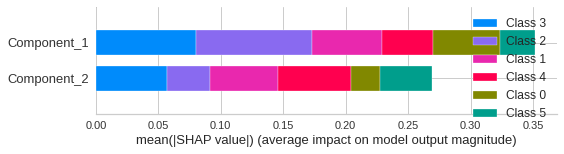

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [82]:
interpret_model(tuned_et_pca, plot='summary')

**Visualize a single prediction**

In [87]:
interpret_model(tuned_et_pca, plot='reason', observation=35)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=1368, verbose=0,
                     warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=35, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


**Visualize many predictions**


In [85]:
interpret_model(tuned_et_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=11, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                     oob_score=False, random_state=1368, verbose=0,
                     warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
